# Comment fonctionnent les fonctions

On a vu dans les précédents épisodes que ``python`` est pratique pour effectuer des tâches rapidement, mais aussi de façon répétitive. 

Par exemple, pour trouver les coefficients d'une régression linéaire, il faut calculer la pente $a$ et l'ordonnée à l'origine $b$ avec ces équations:

$$ a = \frac{ n\sum_{i=1}^n x_i y_i - \sum_{i=1}^n x_i \sum_{i=1}^n y_i}{n \sum_{i=1}^n x_i^2 - (\sum_{i=1}^n x_i )^2}$$

$$ b =  \bar{y} - a\bar{x}$$ 

Pour deux vecteurs x et y, on peut implémenter ces équations en python de cette façon:

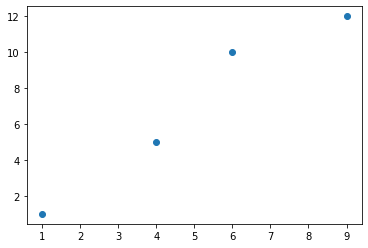

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


x = np.array([1, 4, 6, 9])
y = np.array([1, 5, 10, 12])

# affichage des données
plt.scatter(x, y)

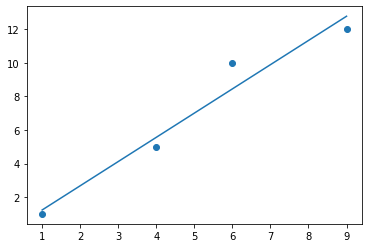

In [9]:
# Calcul de a et b
n = len(x)
a = (n*np.sum(x*y) - np.sum(x)*np.sum(y))/(n*np.sum(x**2) - np.sum(x)**2)
b = np.mean(y) - a*np.mean(x)

plt.scatter(x, y)
plt.plot(x, a*x+b)

L'implémentation est (relativement) simple. Toutefois, si je voulais recalculer ces paramètres pour d'autres paires de x et y, je devrais ré-écrire les lignes écrites plus haut, par exemple:

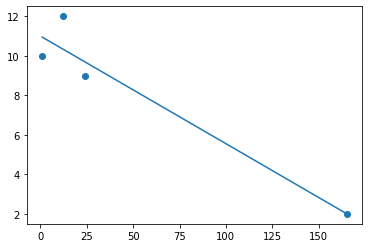

In [14]:
x = np.array([1, 12, 24, 165])
y = np.array([10, 12, 9, 2])

plt.scatter(x, y)

# Calcul de a et b
n = len(x)
a = (n*np.sum(x*y) - np.sum(x)*np.sum(y))/(n*np.sum(x**2) - np.sum(x)**2)
b = np.mean(y) - a*np.mean(x)

plt.plot(x, a*x + b)

Ça devient compliqué et embêtant de toujours ré-écrire les mêmes lignes de code. Une façon simple et compréhensible de clarifier son code devient l'usage de *fonctions*. Tu utilise déjà plusieurs fonctions, comme par exemple ``np.mean`` ou bien ``ul.lin_regress``, afin de simplifier ton code. On peut définir une fonction en python comme suit:

In [15]:
def régression_linéaire(x, y):
    n = len(x)
    a = (n*np.sum(x*y) - np.sum(x)*np.sum(y))/(n*np.sum(x**2) - np.sum(x)**2)
    b = np.mean(y) - a*np.mean(x)
    return a, b

Il y a plusieurs parties à la fonction:
- Le mot clé ``def`` sert à montrer à python qu'on veut commencer à *définir* une fonction.
- ``régression_linéaire`` est le mot clé qui servira à appeler la fonction. Attention à toujours bien ne pas séparer les mots par des espaces, d'où l'usage du ``_``
- ``(x, y)`` indique les arguments que la fonction prendra en entrée. Ici, la fonction prends deux arguments, un vecteur ``x`` et un vecteur ``y``. Une fonction peut prendre autant d'arguments que tu le souhaite, même zéro!
- On doit toujours terminer la première ligne par un deux points ``:``, question de syntaxe.
- Les lignes de codes suivants, *indentées* ou plus simplement *tabulées* seront exécutées chaque fois qu'on appelera notre fonction.
- Le mot clé ``return`` suivi de ``a, b`` indique que la fonction doit *retourner* les coefficients ``a`` et ``b`` lorsque l'exécution est terminée.

Voilà un exemple d'appel de notre fonction:

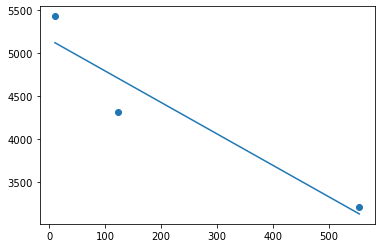

In [38]:
x = np.array([10, 123, 555])
y = np.array([5432, 4321, 3210])

plt.scatter(x, y)

a, b = régression_linéaire(x, y)

plt.plot(x, a*x + b)

# Le TP3: corrélations entre plusieurs variables

Dans le cadre du TP3, nous aurons à consulter un tableur `.csv` contenant des données de concentration d'éléments chimique. Nous voudrons étudier les relations entre ces différents éléments en consultant leurs *covariances*, c'est à dire comment la concentration d'un des éléments tends à changer avec le changement d'un autre. En d'autres mots, s'il y a une corrélation entre elles.

À l'aide de ``matplotlib``, on peut afficher la disposition géographique de nos points et consulter leurs concentrations chimiques:

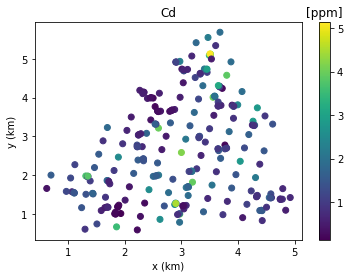

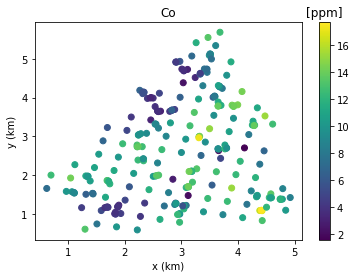

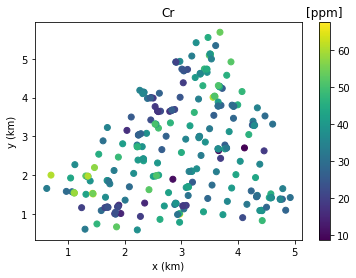

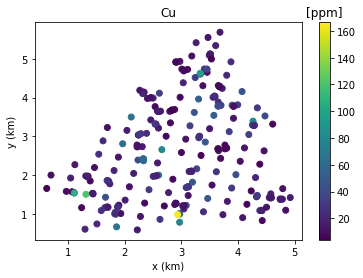

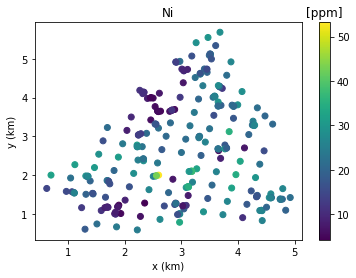

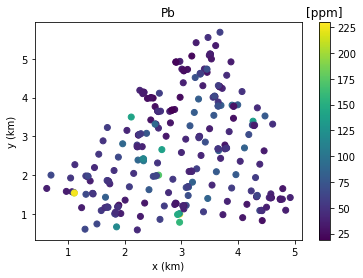

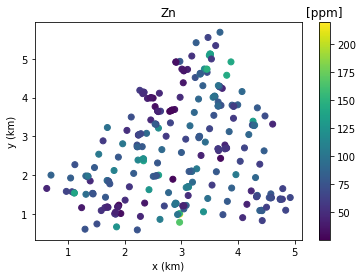

In [50]:
import pandas as pd

# J'extraies les données du fichier .csv à l'aide de pandas, une librairie similaire à numpy,
# mais mieux adaptée pour les jeux de données
df = pd.read_csv('sols.csv', delimiter=',')

# Je garde en mémoire les coordonnées x et y de mes échantillons
x, y = df['x(km)'],df['y(km)']

# les différents éléments pour lesquels je veux afficher une carte
elements = ['Cd', 'Co', 'Cr', 'Cu', 'Ni', 'Pb', 'Zn']

for ele in elements:
    
    # je crée un noueau graphique
    plt.figure() 
    
    # j'affiche les points x et y. Le mot clé c= me permet de définir une couleur différente, 
    # proportionnelle à la concentration dans df[elem]
    plt.scatter(x, y, c=df[ele]) 
    
    # Une barre indiquant la concentration en lien avec la couleur est placée sur le côté
    cb = plt.colorbar()
    
    # Je rend le graphique joli et clair
    plt.title(ele)
    plt.xlabel('x (km)')
    plt.ylabel('y (km)')
    cb.ax.set_title('[ppm]')


On souhaiterait pouvoir étudier la variation des concentrations des différents éléments chimiques entres elles. Est-ce que les éléments riches en cuivres sont aussi riches en zinc? Est-ce le cas pour d'autres éléments?

Une façon visuelle de procéder est de consulter leurs valeurs sur un graphique ou un élément est fonction de l'autre. Voici un exemple pour le cuivre et le zinc:

Text(0, 0.5, 'Zn [ppm]')

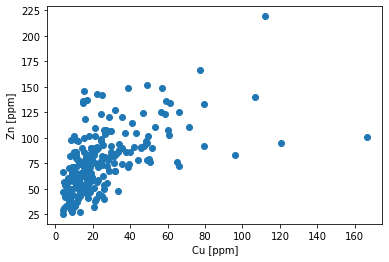

In [54]:
cu = df['Cu']
zn = df['Zn']

plt.scatter(cu, zn)
plt.xlabel('Cu [ppm]')
plt.ylabel('Zn [ppm]')

Comme dans le dernier TP, on peut penser qu'il existe une relation entre les deux variables lorque l'augmentation de l'une des deux cause l'augmentation de l'autre. Ici, ce n'est pas très clair. Lorsqu'on consulte la relation entre le logarithme des deux variables, c'est plus clair:

Text(0, 0.5, 'Zn [ppm]')

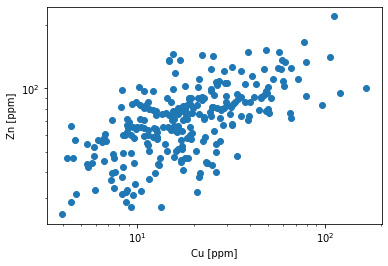

In [56]:
plt.scatter(cu, zn)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Cu [ppm]')
plt.ylabel('Zn [ppm]')

Il serait bien d'avoir une façon claire de quantifier la relation entre deux variables. 

Mathématiquement, la variance $\mathbb{V}(\text{X})$ d'une variable aléatoire $\text{X}$ est exprimée comme suit:


$$\mathbb{V}(\text{X}) \approx \frac{1}{n-1}\sum_{i=1}^n (x_i - \bar{x})^2$$

On peut remarquer que ainsi, *l'écart-type* est la racine de la variance, ou, autrement dit, la variance est le carré de l'écart-type:

$$ \sqrt{\mathbb{V}(\text{X})} \approx \sqrt{\frac{1}{n-1}\sum_{i=1}^n (x_i - \bar{x})^2} = \sigma(\text{X})$$


Maintenant, pour deux variables aléatoires $\text{X}$ et $\text{Y}$, on parle de la *covariance* $\text{Cov(X, Y)}$:

$$ \text{Cov(X, Y)} \approx \frac{1}{n-1}\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})$$

On peut remarquer que pour 
$$\text{Cov(X, X)} \approx \frac{1}{n-1}\sum_{i=1}^n (x_i - \bar{x})(x_i - \bar{x}) = \frac{1}{n-1}\sum_{i=1}^n (x_i - \bar{x})^2 = \mathbb{V}(\text{X})$$

La *variance* n'est donc qu'un cas particulier de la *covariance*. Laissons le prochain graphique nous l'expliquer:


Text(0.5, 0.1, 'Variance = 0.09')

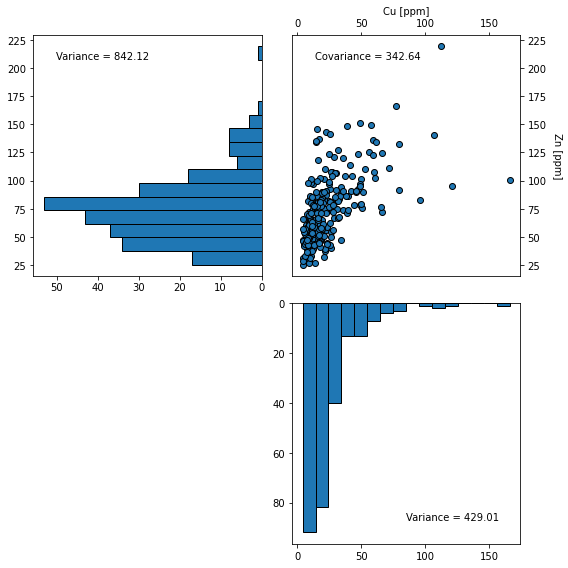

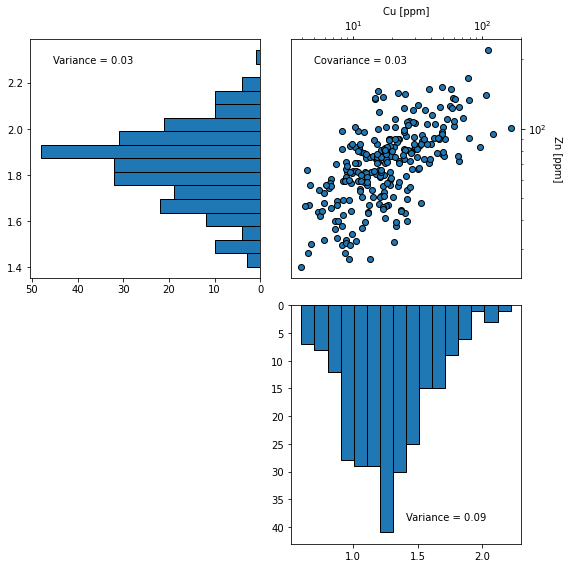

In [96]:
cov = np.cov(cu, zn)

fig = plt.figure(figsize=(8,8), tight_layout=True)
ax = fig.add_subplot(222)
ax.scatter(cu, zn, ec='k')
ax.set_xlabel('Cu [ppm]')
ax.set_ylabel('Zn [ppm]', rotation=270, labelpad=15)
ax.xaxis.tick_top()
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.xaxis.set_label_position("top")


ax.text(0.1, 0.9, f'Covariance = {cov[0, 1]:.2f}', transform=ax.transAxes)

zn_ax = fig.add_subplot(221)
zn_ax.hist(zn, bins=int(np.sqrt(len(zn))), orientation='horizontal', ec='k')
zn_ax.invert_xaxis()
zn_ax.text(0.1, 0.9, f'Variance = {cov[1, 1]:.2f}', transform=zn_ax.transAxes)

cu_ax = fig.add_subplot(224)
cu_ax.hist(cu, bins=int(np.sqrt(len(cu))),ec='k')
cu_ax.invert_yaxis()
cu_ax.text(0.5, 0.1, f'Variance = {cov[0, 0]:.2f}', transform=cu_ax.transAxes)


cov = np.cov(np.log10(cu), np.log10(zn))
fig = plt.figure(figsize=(8,8), tight_layout=True)
ax = fig.add_subplot(222)

ax.scatter(cu, zn, ec='k')
ax.set_xscale('log')
ax.set_yscale('log')
ax.xaxis.tick_top()
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.xaxis.set_label_position("top")
ax.text(0.1, 0.9, f'Covariance = {cov[0, 1]:.2f}', transform=ax.transAxes)
ax.set_xlabel('Cu [ppm]')
ax.set_ylabel('Zn [ppm]', rotation=270, labelpad=15)

zn_ax = fig.add_subplot(221)
zn_ax.hist(np.log10(zn), bins=int(np.sqrt(len(zn))), orientation='horizontal', ec='k')
zn_ax.invert_xaxis()
zn_ax.text(0.1, 0.9, f'Variance = {cov[1, 1]:.2f}', transform=zn_ax.transAxes)


cu_ax = fig.add_subplot(224)
cu_ax.hist(np.log10(cu), bins=int(np.sqrt(len(cu))),ec='k')
cu_ax.invert_yaxis()
cu_ax.text(0.5, 0.1, f'Variance = {cov[0, 0]:.2f}', transform=cu_ax.transAxes)



Les chiffres ne sont pas très utiles non? En effet, la valeur de la covariance est directement reliée à l'échelle des valeurs qu'on mesure. Il est intéressant de se pencher sur une valeur *normalisée*, c'est à dire indépendante de l'échelle des valeurs mesurée. 

On introduit donc le coefficient de corrélation $r$:

$$r = \frac{\text{Cov(X,Y)}}{\sigma_x \sigma_y} $$

Où $\sigma_x$ et $\sigma_y$ sont les écarts-types des variables $\text{X}$ et $\text{Y}$. Ce coefficient prend une valeur entre -1 et 1. Consultons les mêmes graphiques générés plus haut, mais avec le coefficient $r$ au lieu de la covariance.

Text(0.5, 0.1, '$r$ = 1.00')

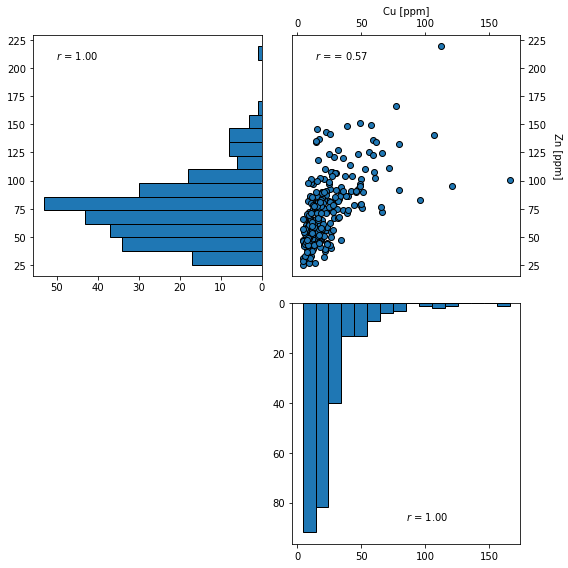

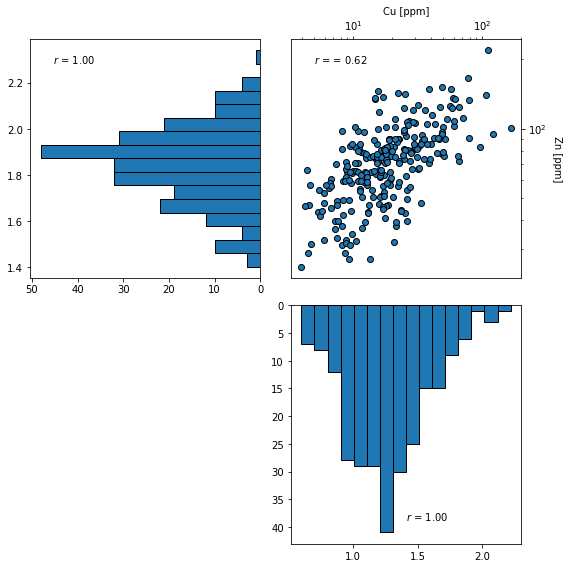

In [106]:
cov = np.corrcoef(cu, zn)
fig = plt.figure(figsize=(8,8), tight_layout=True)
ax = fig.add_subplot(222)
ax.scatter(cu, zn, ec='k')
ax.set_xlabel('Cu [ppm]')
ax.set_ylabel('Zn [ppm]', rotation=270, labelpad=15)
ax.xaxis.tick_top()
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.xaxis.set_label_position("top")


ax.text(0.1, 0.9, f'$r$ = {cov[0, 1]:.2f}', transform=ax.transAxes)

zn_ax = fig.add_subplot(221)
zn_ax.hist(zn, bins=int(np.sqrt(len(zn))), orientation='horizontal', ec='k')
zn_ax.invert_xaxis()
zn_ax.text(0.1, 0.9, f'$r$ = {cov[1, 1]:.2f}', transform=zn_ax.transAxes)

cu_ax = fig.add_subplot(224)
cu_ax.hist(cu, bins=int(np.sqrt(len(cu))),ec='k')
cu_ax.invert_yaxis()
cu_ax.text(0.5, 0.1, f'$r$ = {cov[0, 0]:.2f}', transform=cu_ax.transAxes)


cov = np.corrcoef(np.log10(cu), np.log10(zn))

fig = plt.figure(figsize=(8,8), tight_layout=True)
ax = fig.add_subplot(222)

ax.scatter(cu, zn, ec='k')
ax.set_xscale('log')
ax.set_yscale('log')
ax.xaxis.tick_top()
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.xaxis.set_label_position("top")
ax.text(0.1, 0.9, f'$r$ = {cov[0, 1]:.2f}', transform=ax.transAxes)
ax.set_xlabel('Cu [ppm]')
ax.set_ylabel('Zn [ppm]', rotation=270, labelpad=15)

zn_ax = fig.add_subplot(221)
zn_ax.hist(np.log10(zn), bins=int(np.sqrt(len(zn))), orientation='horizontal', ec='k')
zn_ax.invert_xaxis()
zn_ax.text(0.1, 0.9, f'$r$ = {cov[1, 1]:.2f}', transform=zn_ax.transAxes)


cu_ax = fig.add_subplot(224)
cu_ax.hist(np.log10(cu), bins=int(np.sqrt(len(cu))),ec='k')
cu_ax.invert_yaxis()
cu_ax.text(0.5, 0.1, f'$r$ = {cov[0, 0]:.2f}', transform=cu_ax.transAxes)


Les valeurs de $r=1$ pour les histogrammes de Zn et Cu sont logiques: la corrélation entre le Zn et le Zn ainsi que le Cu pour le Cu sont parfaites. 

Toutefois, c'est bien sur beaucoup plus intéressant pour les corrélations entre le Cu et le Zn. Pour les valeurs brutes, la valeur de $r = 0.57$. Pour les logarithmes, la valeur est plus grande, avec $r=0.62$. 

Un peu comme pour le coefficient de détermination $R^2$, une valeur plus grande nous indique une meilleure corrélation! 

Maintenant, on se demande s'il existe un test statistique nous permettant de déterminer si la valeur de $r$ est significativement différente de 0. On se rappelle que nous n'avons qu'un échantillon de nos deux variables aléatoires; après tout, c'est peut-être simplement un coup de chance d'avoir observé de telles valeurs. On définit donc que $r$ est le coefficient de corrélation de nos deux échantillons et $\rho$ est le coefficient de corrélation des deux populations, c'est à dire tout les échantillons s'il était possible de les mesurer.

On veut donc calculer un test statistique pour $\rho$, avec les hypothèses suivantes:

$$H_0: \rho = 0$$
$$H_1: \rho \neq 0$$

On doit donc encore calculer un test $t_{obs}$ avec la valeur suivante:

$$t_{obs} = r\sqrt{\frac{n-2}{1-r^2}}$$

On doit ensuite se référer à des tables de valeurs (A.3 dans les notes) pour déterminer si notre coefficient est statistiquement significativement différent de 0. Encore une fois, lorsque $t_{obs} > t_{crit}$, on rejette l'hypothèse nulle $H_0$.

In [112]:
n = len(cu)
r = np.corrcoef(cu, zn)[0, 1]
t = r * np.sqrt((n-2)/(1-r**2))
print(f'Degré de liberté: {n - 2}')
print(f'Coefficient de corrélation: {r:.2f}')
print(f'Valeur du test t_obs: {t:.2f}')

Degré de liberté: 257
Coefficient de corrélation: 0.57
Valeur du test t_obs: 11.12
